## Pandas 시각화

### Pandas와 pyplot의 연계
- pandas의 시리즈나 데이터프레임은 Plot이라는 시각화 함수를 내장하고 있다
- plot은 matplotlib를 내부적으로 임포트하여 사용한다

--------------------------------
## #01. 필요한 패키지 및 샘플 데이터 준비

In [3]:
import numpy
from pandas import DataFrame
from matplotlib import pyplot
from sample import traffic

In [4]:
df = DataFrame(traffic)
df

,seoul,busan,daegu,inchun,month
0,3166,927,933,655,1월
1,2728,857,982,586,2월
2,3098,988,1049,629,3월
3,3172,955,1032,669,4월
4,3284,1014,1083,643,5월
5,3247,974,1117,627,6월
6,3268,1029,1076,681,7월
7,3308,1040,1080,657,8월
8,3488,1058,1174,662,9월
9,3312,971,1163,606,10월


## #02. 데이터 전처리

In [5]:
# 빈 딕셔너리 생성
new_name = {}

# '월'에 대한 컬럼만 리스트로 변환하여 반복처리
for i, v in enumerate(list(df['month'])):
    # 딕셔너리에 {인덱스:값} 형식으로 채워 넣음
    new_name[i] = v

new_name

{0: '1월',
 1: '2월',
 2: '3월',
 3: '4월',
 4: '5월',
 5: '6월',
 6: '7월',
 7: '8월',
 8: '9월',
 9: '10월',
 10: '11월',
 11: '12월'}

In [6]:
# 데이터프레임의 인덱스이름과 컬럼이름 변경
월별교통사고 = df.rename(index=new_name, columns={'seoul':'서울','busan':'부산','daegu':'대구','inchun':'인천'})

#결과확인
월별교통사고

,서울,부산,대구,인천,month
1월,3166,927,933,655,1월
2월,2728,857,982,586,2월
3월,3098,988,1049,629,3월
4월,3172,955,1032,669,4월
5월,3284,1014,1083,643,5월
6월,3247,974,1117,627,6월
7월,3268,1029,1076,681,7월
8월,3308,1040,1080,657,8월
9월,3488,1058,1174,662,9월
10월,3312,971,1163,606,10월


In [7]:
# 기존의 '월'컬럼은 삭제
월별교통사고.drop('month',axis=1,inplace=True)

# 결과확인
월별교통사고

,서울,부산,대구,인천
1월,3166,927,933,655
2월,2728,857,982,586
3월,3098,988,1049,629
4월,3172,955,1032,669
5월,3284,1014,1083,643
6월,3247,974,1117,627
7월,3268,1029,1076,681
8월,3308,1040,1080,657
9월,3488,1058,1174,662
10월,3312,971,1163,606


## #02)선 그래프

1)그래프 환경설정

In [8]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,10)

In [9]:
# x좌표를 의미할 리스트나 배열 생성
xpos = numpy.arange(len(월별교통사고['서울']))
xpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
# x좌표에 적용할 텍스트의 리스트 생성
xtext = list(월별교통사고.index)
xtext

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

2) 특정 컬럼에 대한 선 그래프

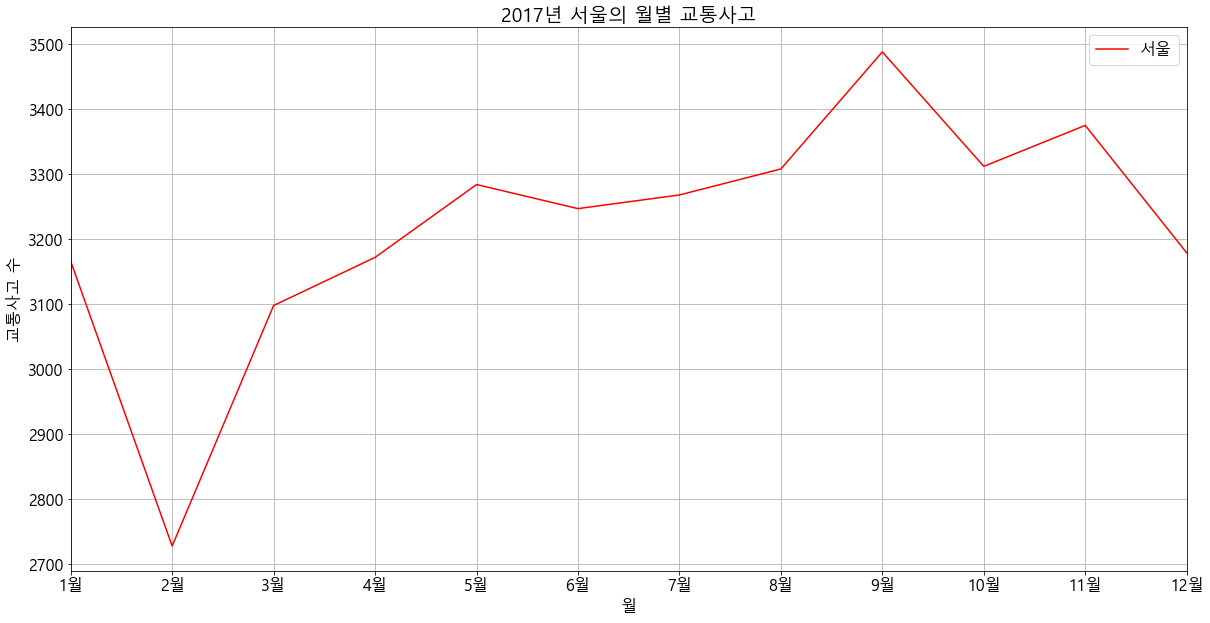

In [11]:
# 특정컬럼에 대해서만 시각화 하기
월별교통사고['서울'].plot(color='#ff0000')
pyplot.grid()
pyplot.legend()
pyplot.title("2017년 서울의 월별 교통사고")
pyplot.xlabel("월")
pyplot.ylabel("교통사고 수")
pyplot.xticks(xpos, xtext)
pyplot.savefig('2017년 서울의 월별 교통사고.png', dpi =300)
pyplot.show()

3) 전체 컬럼에 대한 시각화

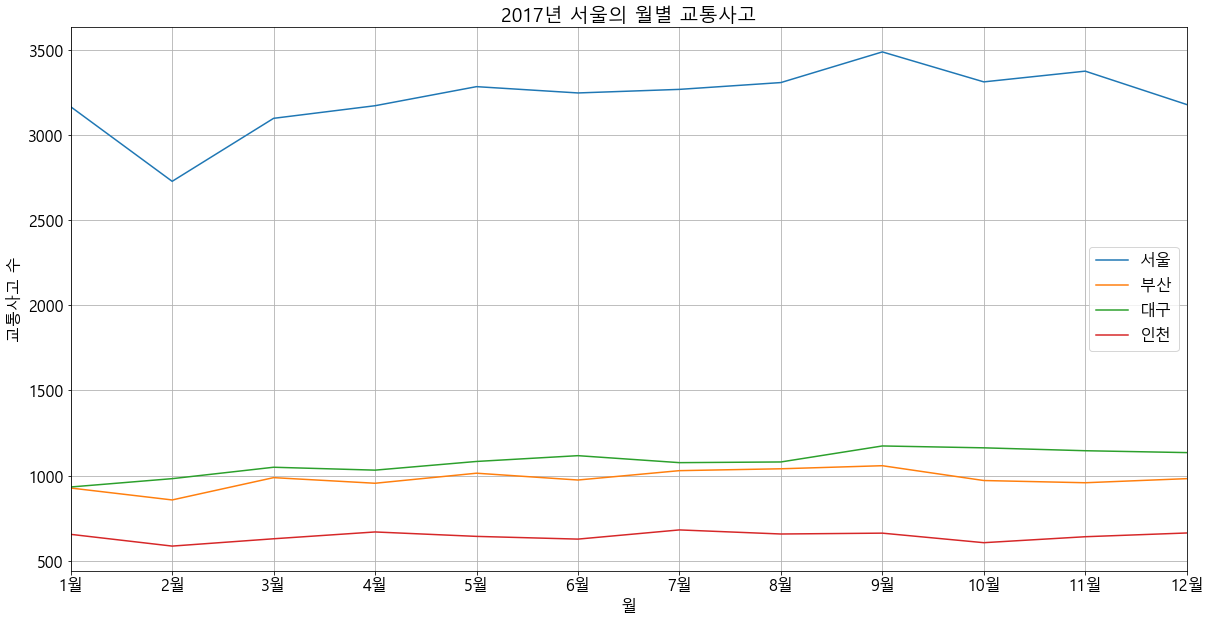

In [12]:
# 전체컬럼에 대해서만 시각화 하기
# 월별교통사고.plot(color='#660000')  //google에서 color picker 검색하면 색상값을 찾을 수 있다
# 월별교통사고.plot(color=['#660000','#006600','#000066','#660066']) // 아무 색상값도 지정하지 않으면 알아서 지정된다
월별교통사고.plot()
pyplot.grid()
pyplot.legend()
pyplot.title("2017년 서울의 월별 교통사고")
pyplot.xlabel("월")
pyplot.ylabel("교통사고 수")
pyplot.xticks(xpos, xtext)
pyplot.savefig('2017년 서울의 월별 교통사고.png', dpi =300)
pyplot.show()

## #03. 세로 막대 그래프

1) 특정 컬럼에 대한 시각화

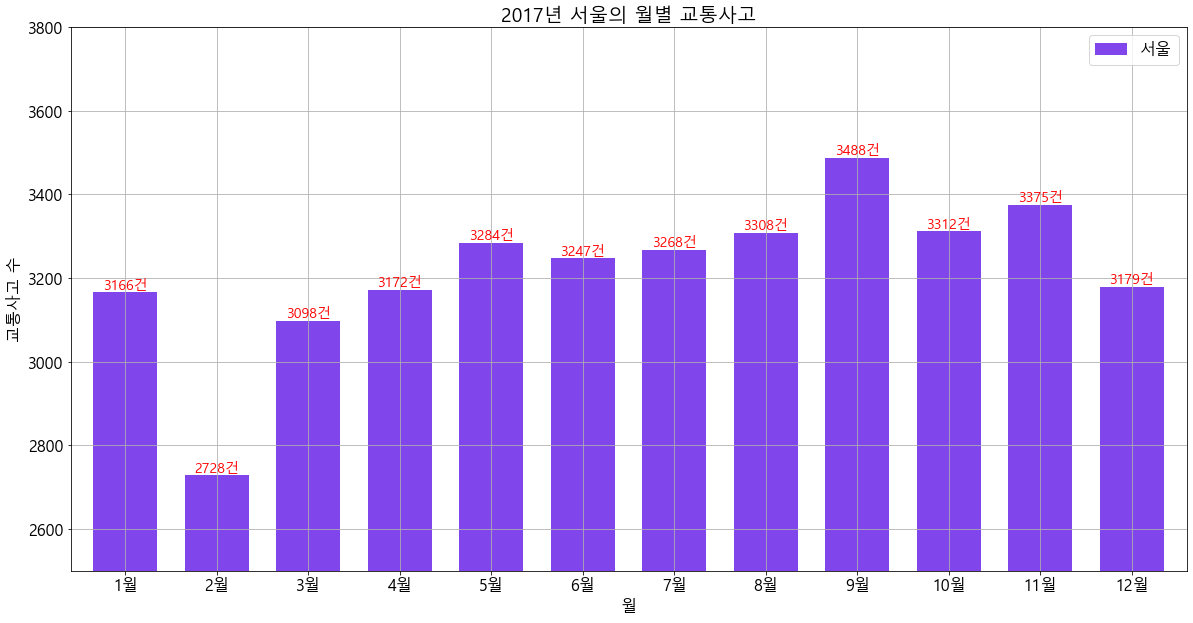

In [13]:
# 특정컬럼에 대해서만 시각화 하기
# 월별교통사고['서울'].plot.bar()
# --> rot 파라미터는 x축 텍스트의 각도, 기본값 90 // 기본값으로는 옆으로 글자가 누워있는 상태
# --> width 파라미터는 모든 막대가 공백없이 꽉 찬 상태를 1로 하여 비율적으로 지정. 기본값은 0.5
월별교통사고['서울'].plot.bar(color='#8046eb', rot=0, width=0.7)
pyplot.grid()
pyplot.legend()
pyplot.title("2017년 서울의 월별 교통사고")
pyplot.xlabel("월")
pyplot.ylabel("교통사고 수")
pyplot.xticks(xpos, xtext)
# y축의 범위 설정 // x축의 번위를 설정할 경우에는 xlim(min,max) 사용
pyplot.ylim(2500,3800)

# 그래프에 텍스트 표시하기
for i, v in enumerate(list(월별교통사고['서울'])):
    txt = "%d건" % v
    pyplot.text(i,v,txt, fontsize=14, color ='#ff0000',horizontalalignment='center',verticalalignment='bottom')
pyplot.show()

2) 전체 컬럼에 대한 시각화

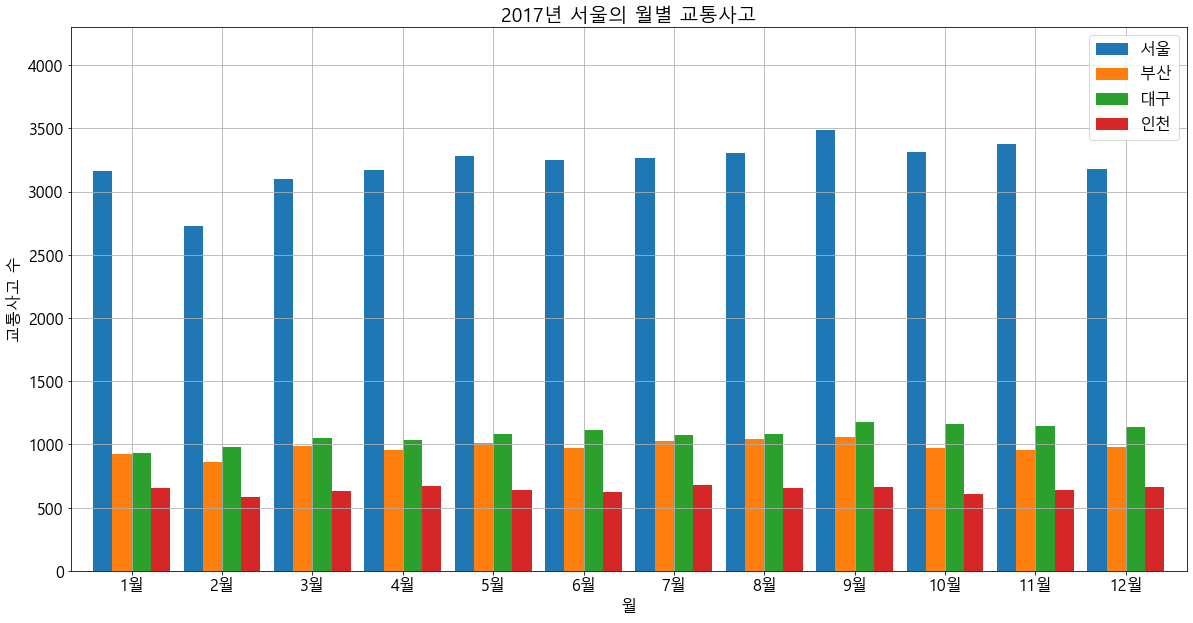

In [14]:
# 전체 컬럼에 대해서만 시각화 하기
# --> rot 파라미터는 x축 텍스트의 각도. 기본값 90
월별교통사고.plot.bar(rot=0, width=0.85)
pyplot.grid()
pyplot.legend()
pyplot.title("2017년 서울의 월별 교통사고")
pyplot.xlabel("월")
pyplot.ylabel("교통사고 수")
pyplot.xticks(xpos, xtext)
pyplot.ylim(0,4300)
pyplot.show()

## #03. 가로 막대 그래프

1)특정컬럼에 대한 시각화

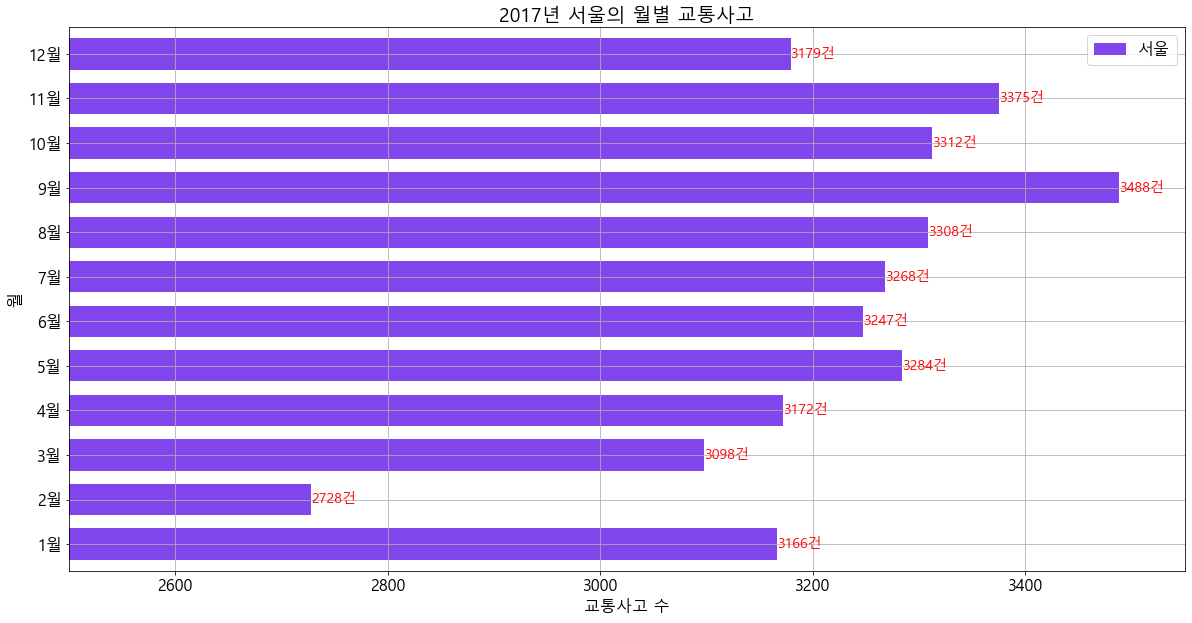

In [15]:
# 특정컬럼에 대해서만 시각화 하기
# 월별교통사고['서울'].plot.barh()
# --> rot 파라미터는 x축 텍스트의 각도, 기본값 90 // 기본값으로는 옆으로 글자가 누워있는 상태
# --> width 파라미터는 모든 막대가 공백없이 꽉 찬 상태를 1로 하여 비율적으로 지정. 기본값은 0.5
월별교통사고['서울'].plot.barh(color='#8046eb', rot=0, width=0.7)
pyplot.grid()
pyplot.legend()
pyplot.title("2017년 서울의 월별 교통사고")
pyplot.xlabel("교통사고 수") #ylabel->xlabel
pyplot.ylabel("월")          #xlabel->ylabel  
pyplot.yticks(xpos, xtext) #xticks -> yticks

# y축의 범위 설정 // x축의 범위를 설정할 경우에는 xlim(min,max) 사용
pyplot.xlim(2500,3550) #ylim -> xlim

# 그래프에 텍스트 표시하기
for i, v in enumerate(list(월별교통사고['서울'])):
    txt = "%d건" % v
    pyplot.text(v,i,txt, fontsize=14, color ='#ff0000',horizontalalignment='left',verticalalignment='center') # i,v -> v,i  center,bottom -> left,center
pyplot.show()

2) 전체 컬럼에 대한 시각화

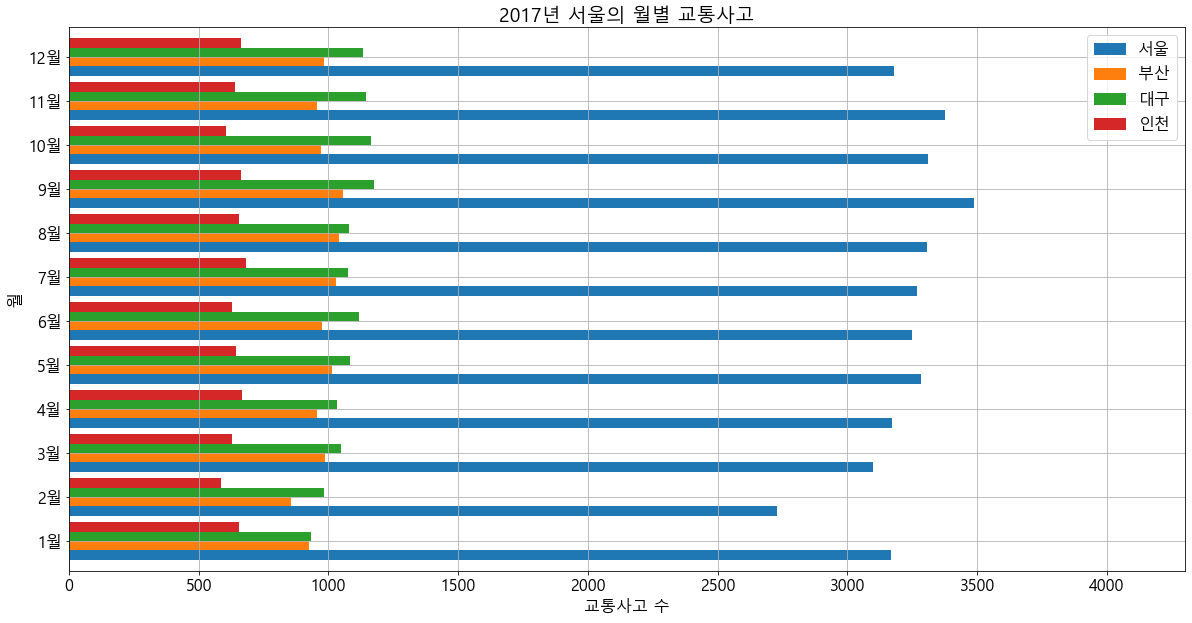

In [16]:
# 전체 컬럼에 대해서만 시각화 하기
# --> rot 파라미터는 x축 텍스트의 각도. 기본값 90
월별교통사고.plot.barh(rot=0, width=0.85)
pyplot.grid()
pyplot.legend()
pyplot.title("2017년 서울의 월별 교통사고")
pyplot.ylabel("월")
pyplot.xlabel("교통사고 수")
pyplot.yticks(xpos, xtext)
pyplot.xlim(0,4300)
pyplot.show()

## #04. 파이 그래프

데이터프레임의 특정 컬럼을 지정하여 전체를 기준으로 어느정도의 비율을 차지하는지를 시각화 하는 그래프

1)파이 그래프 기본형

In [17]:
# 각 컬럼별로 합계 구하기 --> 도시별 1년간의 교통사고량
total = 월별교통사고.sum()
total

서울    38625
부산    11753
대구    12970
인천     7719
dtype: int64

In [18]:
# 구해진 총합을 사용해서 데이터프레임 생성
교통사고합계 = DataFrame(total, columns=['교통사고'])
교통사고합계

,교통사고
서울,38625
부산,11753
대구,12970
인천,7719


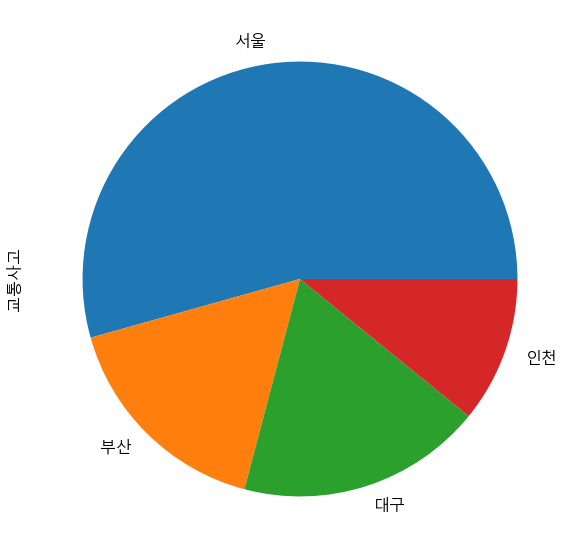

In [19]:
# 데이터프레임의 특정 컬럼에 대한 파이그래프 표시 -> 반드시 특정 컬럼을 지정해야 함
교통사고합계['교통사고'].plot.pie()
pyplot.show()

2) 파이 그래프의 옵션 설정

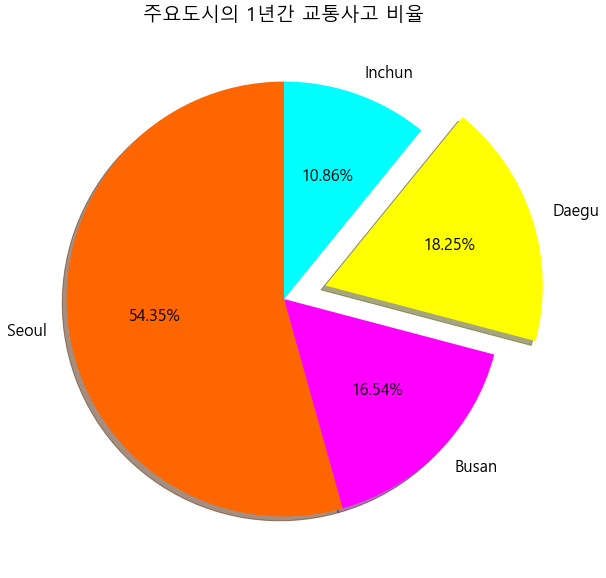

In [23]:
# 라벨
라벨 = ['Seoul','Busan','Daegu','Inchun']

# 각 항목의 색상
색상 = ['#ff6600','#ff00ff','#ffff00','#00ffff']

# 확대비율
비율 = [0.0, 0.0, 0.2, 0.0]

#파이 그래프에 각각의 옵션 적용
교통사고합계['교통사고'].plot.pie(labels=라벨, colors=색상, explode=비율, autopct='%0.2f%%', shadow=True, startangle=90)

# y축 라벨 표시 안함
pyplot.ylabel(None)

# 제목지정
pyplot.title("주요도시의 1년간 교통사고 비율")

pyplot.show()

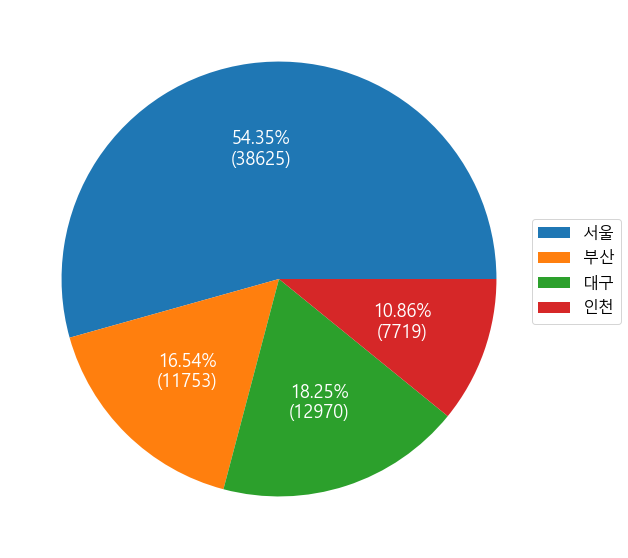

In [21]:
# 아래는 상용구처럼 흔히 쓴다
# pct는 각 섹션의 비율, values는 전체 데이터 리스트
def make_autopct(pct, values):
    total = sum(values)
    val = int(round(pct*total/100.0)) # 퍼센티지*전체값/100 해서 실제 교통사고건수를 역으로 구함
    return '{p:0.2f}%\n({v:d})'.format(p=pct,v=val)

# 파이그래프의 각 섹션 수 만큼 'make_autopic'함수가 호출되고 이 함수 안에서는 각 섹션에 출력할 텍스트를 만들어서 리턴한다
교통사고합계['교통사고'].plot.pie(labels=None, autopct=lambda pct: make_autopct(pct, 교통사고합계['교통사고']), textprops={'color':"#ffffff",'fontsize':18})
    
#교통사고합계['교통사고'].plot.pie(labels=None, textprops={'color':"#ffffff",'fontsize':18})    

pyplot.ylabel(None)

# 범주지정
# labels -> 각 섹션별 제목
# bbox_to_anchor(x,y) -> 0,0을 기준으로 범주의 위치(2차원 좌표)
pyplot.legend(labels=list(교통사고합계.index), bbox_to_anchor=(0.95,0.625))

pyplot.show()

## #05. 산점도 그래프

- 두 변수 간의 영향력을 보여주기 위해 가로축과 세로축에 대한 데이터 포인트를 그리는데 사용된다
- 데이터포인트들이 오밀조밀 뭉쳐 있으면 두 변수는 서로 관련성 정도가 높고 흩어져 있으면 관련성이 낮다.

예)여름철 온도와 아이스크림 판매량의 상관관계 분석

- 첫번째변수 : 날짜별 온도
- 두번째변수 : 날짜별 아이스크림 판매량

이 두 변수의 상관관계를 표현한 그래프를 산점도로 표현할 수 있다

In [22]:
# 온도와 아이스크림 판매 수량
data = {
    '기온':[23,25,26,27,28,29,30,32,33],
    '판매량':[2100,2300,2500,2800,3300,3500,3600,3700,3900]
}

df=DataFrame(data)
df

,기온,판매량
0,23,2100
1,25,2300
2,26,2500
3,27,2800
4,28,3300
5,29,3500
6,30,3600
7,32,3700
8,33,3900


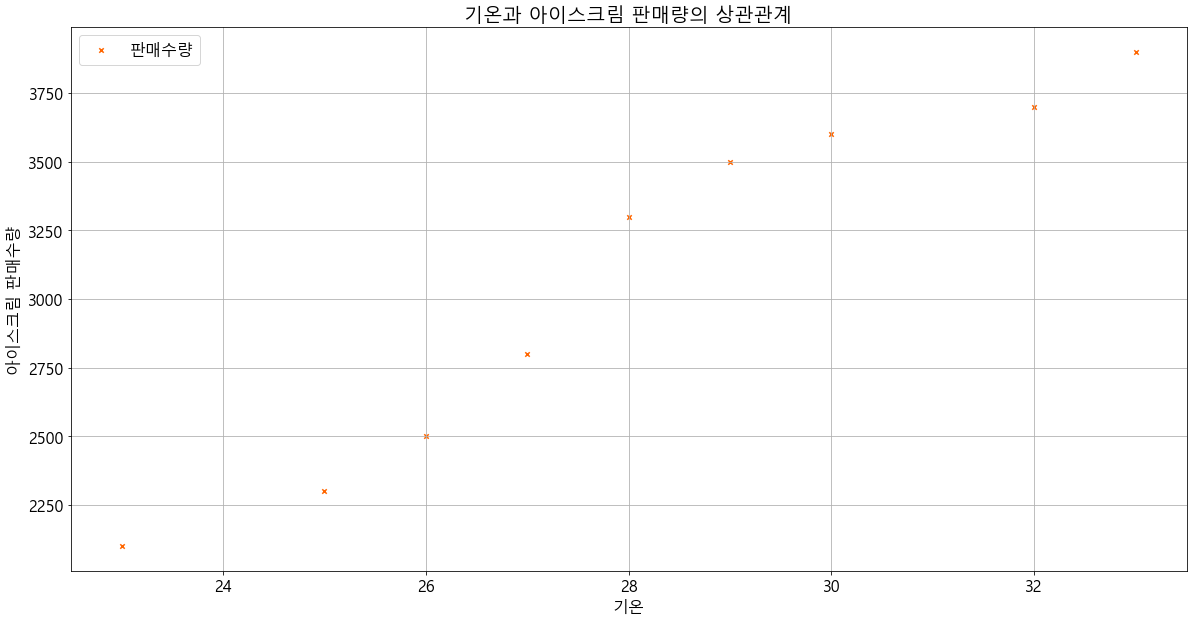

In [104]:
# 산점도 그래프는 두 컬럼(변수)간의 관계를 분석하기 위해 사용된다.
# marker -> o,v,^,<,>,8,s,p,*,h,H,D,d,P,X
df.plot.scatter(x='기온',y='판매량',color='#ff6600',marker='x',label='판매수량')
pyplot.grid()
pyplot.title("기온과 아이스크림 판매량의 상관관계")
pyplot.ylabel('아이스크림 판매수량')
pyplot.xlabel('기온')
pyplot.show()

# KOSIS : 국가정보포털에서 필요한 데이터 받아서 처리한다.<br>
# --> 원하는거 필터걸고 엑셀로 다운로드 받아서 처리한다